In [1]:
import cobra

In [1]:
import cobra
#import cplex
import libsbml
import pandas as pd
from cobra import Model, Reaction, Metabolite
from d3flux import flux_map
from numpy import allclose, dot
from cobra import Model
from typing import TYPE_CHECKING, NamedTuple, Optional, Union
import numpy as np
import pandas as pd
import escher
from escher import Builder
from time import sleep

In [17]:
from cobra.util import create_stoichiometric_matrix

In [18]:
from cobra.core import (
    Configuration,
    DictList,
    Gene,
    Metabolite,
    Model,
    Object,
    Reaction,
    Solution,
    Species,
)
from cobra import flux_analysis
from cobra import io
from cobra import medium
from cobra import sampling
from cobra import summary
from cobra.util import show_versions

In [2]:
#yali = cobra.io.read_sbml_model('iYali-tidy W29 strain.xml')
yali = cobra.io.read_sbml_model('yalinewpathways.xml')

In [33]:
yali.metabolites.s_1382

Metabolite identifier,s_1382
Name,propionyl-CoA
Memory address,0x7f4c06fbc710
Formula,C24H36N7O17P3S
Compartment,m
In 1 reaction(s),y000028


In [13]:
yali.reactions.y300098

AttributeError: DictList has no attribute or entry y300098

In [8]:
# Create an empty set to store the reactions
compartment_reactions = set()

# Iterate over each reaction in the model
for reaction in yali.reactions:
    # Iterate over each metabolite in the reaction
    for metabolite in reaction.metabolites:
        # If the metabolite's compartment is 'c', add the reaction to the set
        if metabolite.compartment == 'lp':
            compartment_reactions.add(reaction)
            break  # No need to check the other metabolites in this reaction

# Now compartment_reactions contains all reactions that have at least one
# metabolite in the 'c' compartment. Print them:
for reaction in compartment_reactions:
    print(reaction)

y000283: s_0944 + s_1312 --> s_0635 + s_0830
y001759: s_0666 <=> s_0669
y000282: s_0746 + s_0944 --> s_0635 + s_1312
y000286: s_0944 + s_1259 --> s_0635 + s_1232
y003573: s_1449 <=> s_2850
y003599: s_2874 <=> s_1479
y003582: s_0629 <=> s_0631
y003574: s_1260 <=> s_2852
y003583: s_1212 <=> s_2952
y003600: s_2876 <=> s_0816
y002125: s_0529 <=> s_0531
y003255: s_3657 + s_3661 --> s_0798 + s_2852 + s_3660
y000287: s_0944 + s_1232 --> s_0606 + s_0635
y000289: s_0944 + s_1549 --> s_0635 + s_0641
y003258: s_3657 + s_3664 --> s_0798 + s_2848 + s_3665
y300011: m1761 + s_0531 + s_2840 <=> m1735 + s_0635 + s_2842
y000292: s_0944 + s_1483 --> s_0635 + s_1310
y003575: s_1073 <=> s_2843
y003584: s_1207 <=> s_2953
y000290: s_0641 + s_0944 --> s_0635 + s_1523
y200009: m572 + s_0798 + s_2952 <=> m577 + s_2953
y003576: s_1176 <=> s_2845
y003585: s_0434 <=> s_2840
y000284: s_0830 + s_0944 --> s_0635 + s_0815
y000281: s_0692 + s_0944 --> s_0635 + s_0746
y003577: s_1302 <=> s_2847
y003586: s_0423 <=> s_284

In [15]:
yali.reactions.xPOOL_FA_LP

Reaction identifier,xPOOL_FA_LP
Name,Fatty acids pool
Memory address,0x7fc65f466790
Stoichiometry,0.199 m1761 + 0.003 s_2841 + 0.002 s_2844 + 0.19 s_2846 + 0.042 s_2850 + 0.515 s_2852 <=> 0.951 m1641 0.199 linoleate + 0.003 laurate + 0.002 myristate + 0.19 palmitate + 0.042 stearate + 0.515 oleate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [29]:
yali.reactions.y300106

Reaction identifier,y300106
Name,"Pentadecylic-CoA transport, cytoplasm-lipid particle"
Memory address,0x7f4c06756790
Stoichiometry,s_0635 + s_2842 + s_3732 <=> s_0531 + s_2840 + s_3733 diphosphate + AMP + Pentadecylic-CoA[lp] <=> coenzyme A + ATP + Pentadecylic acid[lp]
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [28]:
yali.metabolites.s_1382

Metabolite identifier,s_1382
Name,propionyl-CoA
Memory address,0x7f4c5054d5d0
Formula,C24H36N7O17P3S
Compartment,m
In 3 reaction(s),"y000028, y300088, y300093"


In [7]:
yali.reactions.y300088

Reaction identifier,y300088
Name,Propionyl-CoA transporter [c] - [m]
Memory address,0x7fc65e5a2e10
Stoichiometry,s_3719 <=> s_1382 Propionyl-CoA[c] <=> propionyl-CoA
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [20]:
# Create the stoichiometric matrix
S = create_stoichiometric_matrix(yali)

In [21]:
print(S)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [29]:
solution = yali.optimize()
flux_vector = solution.fluxes.values
sum(abs(dot(S, flux_vector)))
allclose(dot(S, flux_vector), 0)

True

In [13]:
# Check mass balance
is_balanced = allclose(dot(S, flux_vector), 0)

In [14]:
print(is_balanced)

True


In [20]:
cobra.io.json.save_json_model(yali, 'yali.json')

In [21]:
builder = Builder()

In [22]:
builder = Builder(
    model_json='yali.json'
)

In [23]:
builder


Builder()

In [14]:
yali.metabolites.s_0444

Metabolite identifier,s_0444
Name,beta-D-...
Memory address,0x7fea493f24d0
Formula,C32H58N2O22P2(C5H8)n
Compartment,g
In 1 reaction(s),y000192


In [15]:
yali.reactions.y000192

Reaction identifier,y000192
Name,"alpha 1,2-mannosyltransferase"
Memory address,0x7fea48eec6d0
Stoichiometry,s_0444 + s_0744 --> s_0414 + s_0740 + s_0797 beta-D-mannosyldiacetylchitobiosyldiphosphodolichol + GDP-alpha-D-mannose --> alpha-D-mannosyl-beta-D-mannosyldiacetylchitobiosyldiphosphodolichol + GDP + H+
GPR,YALI0A06589g or YALI0B01672g or YALI0E01892g or YALI0F25817g
Lower bound,0.0
Upper bound,1000.0


In [3]:
yali.compartments

{'ce': 'cell envelope',
 'e': 'extracellular',
 'm': 'mitochondrion',
 'c': 'cytoplasm',
 'p': 'peroxisome',
 'er': 'endoplasmic reticulum',
 'n': 'nucleus',
 'g': 'Golgi',
 'lp': 'lipid particle',
 'v': 'vacuole',
 'erm': 'endoplasmic reticulum membrane',
 'vm': 'vacuolar membrane',
 'mm': 'mitochondrial membrane',
 'gm': 'Golgi membrane'}

In [5]:
flux_map(yali, display_name_format=lambda x: str(x.id), figsize=(300,250),
         flux_dict={rxn.id: None for rxn in yali.reactions})

In [4]:
yali.reactions

[<Reaction xAMINOACID at 0x7f75452dd5d0>,
 <Reaction xBIOMASS at 0x7f75452dd510>,
 <Reaction xLIPID at 0x7f758084f450>,
 <Reaction xMAINTENANCE at 0x7f758084f990>,
 <Reaction xPOOL_AC_EM at 0x7f758084f4d0>,
 <Reaction xPOOL_AC_LP at 0x7f758084f810>,
 <Reaction xPOOL_AC_MM at 0x7f758084f750>,
 <Reaction xPOOL_FA_EM at 0x7f7580865550>,
 <Reaction xPOOL_FA_EN at 0x7f7580865b90>,
 <Reaction xPOOL_FA_LP at 0x7f7580865590>,
 <Reaction xPOOL_FA_MI at 0x7f758086b990>,
 <Reaction xPOOL_FA_MM at 0x7f758086b350>,
 <Reaction y000001 at 0x7f758086b9d0>,
 <Reaction y000002 at 0x7f7580872d10>,
 <Reaction y000004 at 0x7f758087f690>,
 <Reaction y000005 at 0x7f758087ffd0>,
 <Reaction y000006 at 0x7f7580804410>,
 <Reaction y000007 at 0x7f7580804a50>,
 <Reaction y000008 at 0x7f7580804510>,
 <Reaction y000009 at 0x7f7580804fd0>,
 <Reaction y000010 at 0x7f758080e3d0>,
 <Reaction y000012 at 0x7f7580808750>,
 <Reaction y000013 at 0x7f758080e450>,
 <Reaction y000014 at 0x7f758080ec10>,
 <Reaction y000015 at 0x

In [5]:
yali.reactions.get_by_id("xBIOMASS").lower_bound

0.0

In [14]:
S = yali.create_stoichiometric_matrix

AttributeError: 'Model' object has no attribute 'create_stoichiometric_matrix'

In [20]:
yali.reactions.R2268

Reaction identifier,R2268
Name,acetyl CoA synthetase
Memory address,0x01906047fa90
Stoichiometry,m182[C_pe] + m2053[C_pe] + m515[C_pe] --> m183[C_pe] + m517[C_pe] + m518[C_pe] coenzyme A_C21H36N7O16P3S + Acetate + ATP_C10H16N5O13P3 --> acetyl-CoA_C23H38N7O17P3S + AMP_C10H14N5O7P + diphosphate_H4O7P2
GPR,YALI1F08845g
Lower bound,0.0
Upper bound,1000.0


In [64]:
cobra.io.read_sbml_model('iYali - Copy for opening it with wordpad.xml')

Name,iYali
Memory address,0x0169b4ba3940
Number of metabolites,1671
Number of reactions,1924
Number of groups,104
Objective expression,1.0*xBIOMASS - 1.0*xBIOMASS_reverse_52bad
Compartments,"cell envelope, extracellular, mitochondrion, cytoplasm, peroxisome, endoplasmic reticulum, nucleus, Golgi, lipid particle, vacuole, endoplasmic reticulum membrane, vacuolar membrane, mitochondrial membrane, Golgi membrane"


In [9]:
slac_c = Metabolite(
's_0063')
slac_c

Metabolite identifier,s_0063
Name,
Memory address,0x01f77944a640
Formula,None
Compartment,None
In 0 reaction(s),


In [11]:
yali.metabolites.s_0063

Metabolite identifier,s_0063
Name,(S)-lactate
Memory address,0x01f778389a00
Formula,C3H5O3
Compartment,c
In 3 reaction(s),"y000004, y001207, y001206"


In [5]:
yali.metabolites.s_0021

Metabolite identifier,s_0021
Name,(R)-carnitine
Memory address,0x022194f37460
Formula,C7H15NO3
Compartment,c
In 6 reaction(s),"y000252, y001673, y001120, y001191, y001674, y001882"


In [12]:
yali.reactions.y001882

Reaction identifier,y001882
Name,L-carnitine transport
Memory address,0x022195a1eee0
Stoichiometry,s_0023 --> s_0021 (R)-carnitine --> (R)-carnitine
GPR,
Lower bound,0.0
Upper bound,1000.0


In [13]:
yali.metabolites.s_0023

Metabolite identifier,s_0023
Name,(R)-carnitine
Memory address,0x022194f374c0
Formula,C7H15NO3
Compartment,m
In 3 reaction(s),"y000254, y001120, y001882"


In [19]:
yali.reactions.y001120

Reaction identifier,y001120
Name,carnithine-acetylcarnithine carrier
Memory address,0x022195885c40
Stoichiometry,s_0023 + s_1235 --> s_0021 + s_1236 (R)-carnitine + O-acetylcarnitine --> (R)-carnitine + O-acetylcarnitine
GPR,YALI0C02431g
Lower bound,0.0
Upper bound,1000.0


In [21]:
yali.metabolites.s_2846

Metabolite identifier,s_2846
Name,palmitate
Memory address,0x02219502fdf0
Formula,C16H31O2
Compartment,lp
In 3 reaction(s),"y003571, xPOOL_FA_LP, y002202"


In [22]:
yali.reactions.y003571

Reaction identifier,y003571
Name,"hexadecanoate (n-C16:0) transport, cytoplasm-lipid particle"
Memory address,0x022195c1c760
Stoichiometry,s_1286 <=> s_2846 palmitate <=> palmitate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [14]:
yali.reactions.y001120

Reaction identifier,y001120
Name,carnithine-acetylcarnithine carrier
Memory address,0x022195885c40
Stoichiometry,s_0023 + s_1235 --> s_0021 + s_1236 (R)-carnitine + O-acetylcarnitine --> (R)-carnitine + O-acetylcarnitine
GPR,YALI0C02431g
Lower bound,0.0
Upper bound,1000.0


In [17]:
solution = yali.optimize()

In [38]:
yali.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
s_0420,y001654,0.9452,0,0.00%
s_0565,y001714,1,6,100.00%
s_0796,y001832,6.26,0,0.00%
s_1277,y001992,1.846,0,0.00%
s_1324,y002005,0.05029,0,0.00%
s_1468,y002060,0.02061,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
s_0446,y001663,-1.98,1,100.00%
s_0805,y002100,-11.02,0,0.00%
s_0450,y002111,-0.1057,0,0.00%


In [10]:
yali.reactions.xPOOL_FA_MI

Reaction identifier,xPOOL_FA_MI
Name,Fatty acids pool
Memory address,0x0266759b1100
Stoichiometry,0.003 m1765 + 0.002 m1766 + 0.19 m1768 + 0.042 m1770 + 0.515 m1771 + 0.199 m1772 <=> 0.951 m1698 0.003 laurate + 0.002 myristate + 0.19 palmitate + 0.042 stearate + 0.515 oleate + 0.199 linoleate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [9]:
yali.metabolites.m1770 

Metabolite identifier,m1770
Name,stearate
Memory address,0x02667583f520
Formula,
Compartment,m
In 1 reaction(s),xPOOL_FA_MI


In [15]:
yali.metabolites.s_2781

Metabolite identifier,s_2781
Name,lauroyl-CoA
Memory address,0x01b16e374970
Formula,C33H54N7O17P3S
Compartment,erm
In 4 reaction(s),"y003515, y002154, xPOOL_AC_EM, y002194"


In [9]:
yali.reactions.xAMINOACID.summary()

In [23]:
yali.reactions.xBIOMASS

Reaction identifier,xBIOMASS
Name,Biomass production
Memory address,0x024ef204a940
Stoichiometry,m1726 + m1727 + 0.4415 s_0002 + 0.0757 s_0423 + 86.7881 s_0434 + 0.4068 s_0509 + 0.0578 s_0526 + 0.0383 s_0584 + 0.0377 s_0589 + 0.0377 s_0615 + 0.0383 s_0649 + 0.093 s_0782 + 0.1104 s_1107 +... protein + lipids + 0.4415 (1-3)-beta-D-glucan + 0.0757 AMP + 86.7881 ATP + 0.4068 chitin + 0.0578 CMP + 0.0383 dAMP + 0.0377 dCMP + 0.0377 dGMP + 0.0383 dTMP + 0.093 GMP + 0.1104 mannan + 0.0032...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [24]:
yali.reactions.xLIPID.summary()

In [12]:
yali.reactions.xMAINTENANCE

Reaction identifier,xMAINTENANCE
Name,Non-growth associated maintenance (NGAM)
Memory address,0x024ef204aa30
Stoichiometry,s_0434 --> s_0394 + s_1322 ATP --> ADP + phosphate
GPR,
Lower bound,0.0
Upper bound,1000.0


In [13]:
yali.reactions.xPOOL_AC_EM

Reaction identifier,xPOOL_AC_EM
Name,Acyl-CoAs pool
Memory address,0x024ef205d970
Stoichiometry,0.199 m1731 + 0.003 s_2781 + 0.002 s_2787 + 0.19 s_2789 + 0.042 s_2791 + 0.515 s_2821 <=> 0.951 m567 0.199 linoleoyl-CoA + 0.003 lauroyl-CoA + 0.002 myristoyl-CoA + 0.19 palmitoyl-CoA + 0.042 stearoyl-CoA + 0.515 oleoyl-CoA <=> 0.951 acyl-CoA
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [6]:
yali.reactions.xPOOL_AC_LP

Reaction identifier,xPOOL_AC_LP
Name,Acyl-CoAs pool
Memory address,0x07fc89984d890
Stoichiometry,0.199 m1735 + 0.003 s_2843 + 0.002 s_2845 + 0.19 s_2847 + 0.042 s_2851 + 0.515 s_2853 <=> 0.951 m570 0.199 linoleoyl-CoA + 0.003 lauroyl-CoA + 0.002 myristoyl-CoA + 0.19 palmitoyl-CoA + 0.042 stearoyl-CoA + 0.515 oleoyl-CoA <=> 0.951 acyl-CoA
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [7]:
yali.reactions.xPOOL_AC_MM

Reaction identifier,xPOOL_AC_MM
Name,Acyl-CoAs pool
Memory address,0x07fc89984d7d0
Stoichiometry,0.003 m1738 + 0.002 m1739 + 0.19 m1741 + 0.042 m1742 + 0.199 m1743 + 0.515 s_3322 <=> 0.951 m790 0.003 lauroyl-CoA + 0.002 myristoyl-CoA + 0.19 palmitoyl-CoA + 0.042 stearoyl-CoA + 0.199 linoleoyl-CoA + 0.515 oleoyl-CoA <=> 0.951 acyl-CoA
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [8]:
yali.reactions.xPOOL_FA_EM

Reaction identifier,xPOOL_FA_EM
Name,Fatty acids pool
Memory address,0x07fc89984d750
Stoichiometry,0.199 m1749 + 0.003 s_2832 + 0.002 s_2835 + 0.19 s_2836 + 0.042 s_2838 + 0.515 s_2839 <=> 0.951 m1658 0.199 linoleate + 0.003 laurate + 0.002 myristate + 0.19 palmitate + 0.042 stearate + 0.515 oleate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [9]:
yali.reactions.xPOOL_FA_EN

Reaction identifier,xPOOL_FA_EN
Name,Fatty acids pool
Memory address,0x07fc899865b50
Stoichiometry,0.003 m1753 + 0.002 m1754 + 0.199 m1756 + 0.515 s_3459 + 0.19 s_3463 + 0.042 s_3464 <=> 0.951 m1661 0.003 laurate + 0.002 myristate + 0.199 linoleate + 0.515 oleate + 0.19 palmitate + 0.042 stearate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [10]:
yali.reactions.xPOOL_FA_LP

Reaction identifier,xPOOL_FA_LP
Name,Fatty acids pool
Memory address,0x07fc899865510
Stoichiometry,0.199 m1761 + 0.003 s_2841 + 0.002 s_2844 + 0.19 s_2846 + 0.042 s_2850 + 0.515 s_2852 <=> 0.951 m1641 0.199 linoleate + 0.003 laurate + 0.002 myristate + 0.19 palmitate + 0.042 stearate + 0.515 oleate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [11]:
yali.reactions.xPOOL_FA_MI

Reaction identifier,xPOOL_FA_MI
Name,Fatty acids pool
Memory address,0x07fc899865b90
Stoichiometry,0.003 m1765 + 0.002 m1766 + 0.19 m1768 + 0.042 m1770 + 0.515 m1771 + 0.199 m1772 <=> 0.951 m1698 0.003 laurate + 0.002 myristate + 0.19 palmitate + 0.042 stearate + 0.515 oleate + 0.199 linoleate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [12]:
yali.reactions.xPOOL_FA_MM

Reaction identifier,xPOOL_FA_MM
Name,Fatty acids pool
Memory address,0x07fc89986a290
Stoichiometry,0.003 m1777 + 0.002 m1778 + 0.515 m1781 + 0.199 m1782 + 0.19 s_3271 + 0.042 s_3277 <=> 0.951 m1655 0.003 laurate + 0.002 myristate + 0.515 oleate + 0.199 linoleate + 0.19 palmitate + 0.042 stearate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [13]:
yali.medium

{'y001654': 1000.0,
 'y001714': 1.0,
 'y001832': 1000.0,
 'y001861': 1000.0,
 'y001992': 1000.0,
 'y002005': 1000.0,
 'y002020': 1000.0,
 'y002049': 1000.0,
 'y002060': 1000.0,
 'y002100': 1000.0}

In [9]:
yali.metabolites.m1803

Metabolite identifier,m1803
Name,isocitrate
Memory address,0x01ea1b958cd0
Formula,
Compartment,e
In 2 reaction(s),"y300080, y300015"


In [10]:
yali.reactions.y300015

Reaction identifier,y300015
Name,isocitrate transport
Memory address,0x01ea1c5e1f40
Stoichiometry,m1803 <=> s_0940 isocitrate <=> isocitrate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [28]:
with yali:
    yali.reactions.y000330.bounds = 0, 0
    print("deoxyguanylate kinase's bounds inside the with statement")
    print(yali.reactions.y000330.lower_bound, yali.reactions.y000330.bounds)
    print('Mutant growth rate: ', yali.optimize().objective_value)
print("deoxyguanylate kinase's bounds outside the with statement")
print(yali.reactions.y000330.bounds)

deoxyguanylate kinase's bounds inside the with statement
0 (0, 0)
Mutant growth rate:  0.10567256978048438
deoxyguanylate kinase's bounds outside the with statement
(-1000.0, 1000.0)


In [20]:
yali.reactions.y001714.upper_bound = 0
yali.reactions.y001714.upper_bound

0

In [21]:
yali.reactions.y001714.lower_bound = 0
yali.reactions.y001714.lower_bound

0

In [8]:
yali.reactions.y001714

Reaction identifier,y001714
Name,D-glucose exchange
Memory address,0x0253e7ed9880
Stoichiometry,s_0565 <-- D-glucose <--
GPR,
Lower bound,-1.0
Upper bound,-1.0


In [31]:
yali.objective='xBIOMASS'#'y001882' #yali.reactions.xBIOMASS

In [32]:
solution = yali.optimize()

In [38]:
solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.012214
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64

In [13]:
yali.metabolites. s_2822

Metabolite identifier,s_2822
Name,butyrate
Memory address,0x0253e7d2e6d0
Formula,C4H7O2
Compartment,e
In 5 reaction(s),"y200005, y200006, y002190, y002187, y200004"


In [38]:
yali.reactions.y002190

Reaction identifier,y002190
Name,butyrate (n-C4:0) transport
Memory address,0x0253ecdf0fd0
Stoichiometry,s_2822 <=> s_2828 butyrate <=> butyrate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
yali.reactions.y002190.upper_bound = 0.0
yali.reactions.y002190.upper_bound


0.0

In [16]:
yali.reactions.y002190.lower_bound = 0.0
yali.reactions.y002190.lower_bound

0.0

In [46]:
yali.objective='xBIOMASS'#'y001882' #yali.reactions.xBIOMASS
solution = yali.optimize()
print(solution.fluxes)
flux = solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.011949
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64


In [47]:
mylistsolu = []
mylistsolu = list(flux)
react = yali.reactions
mylistreactions = []
mylistreactions = list(react)
dictionary = dict(zip(mylistreactions, mylistsolu))
df = pd.DataFrame(data=dictionary, index=[0])
df = (df.T)
df.to_excel('no knockdown.xlsx')

In [20]:
yali.metabolites.s_0022

Metabolite identifier,s_0022
Name,(R)-carnitine
Memory address,0x0253e8d71970
Formula,C7H15NO3
Compartment,e
In 2 reaction(s),"y001545, y001191"


In [30]:
yali.reactions.y001191

Reaction identifier,y001191
Name,L-carnitine transport
Memory address,0x0253ebf06940
Stoichiometry,s_0022 <=> s_0021 (R)-carnitine <=> (R)-carnitine
GPR,YALI0C07678g
Lower bound,-1000.0
Upper bound,1000.0


In [22]:
yali.reactions.y001191.upper_bound = 0.0
yali.reactions.y001191.upper_bound 

0.0

In [23]:
yali.reactions.y001191.lower_bound = 0.0
yali.reactions.y001191.lower_bound

0.0

In [24]:
yali.objective='xBIOMASS'#'y001882' #yali.reactions.xBIOMASS
solution = yali.optimize()
print(solution.fluxes)
flux = solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.011949
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64


In [26]:
mylistsolu = []
mylistsolu = list(flux)
react = yali.reactions
mylistreactions = []
mylistreactions = list(react)
dictionary = dict(zip(mylistreactions, mylistsolu))
df = pd.DataFrame(data=dictionary, index=[0])
df = (df.T)
df.to_excel('carnitine knockdown.xlsx')

In [31]:
yali.metabolites.s_0026

Metabolite identifier,s_0026
Name,(R)-lactate
Memory address,0x0253e9dfb5e0
Formula,C3H5O3
Compartment,e
In 2 reaction(s),"y001136, y001546"


In [32]:
yali.reactions.y001136

Reaction identifier,y001136
Name,D-lactate transport
Memory address,0x0253ebec9640
Stoichiometry,s_0026 + s_0796 <=> s_0025 + s_0794 (R)-lactate + H+ <=> (R)-lactate + H+
GPR,YALI0C15488g or YALI0C21406g or YALI0D20108g or YALI0D24607g or YALI0E32901g
Lower bound,-1000.0
Upper bound,1000.0


In [33]:
yali.reactions.y001136.upper_bound = 0.0
yali.reactions.y001136.upper_bound 

0.0

In [34]:
yali.reactions.y001136.lower_bound = 0.0
yali.reactions.y001136.lower_bound

0.0

In [35]:
yali.objective='xBIOMASS'#'y001882' #yali.reactions.xBIOMASS
solution = yali.optimize()
print(solution.fluxes)
flux = solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.000000
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64


In [36]:
mylistsolu = []
mylistsolu = list(flux)
react = yali.reactions
mylistreactions = []
mylistreactions = list(react)
dictionary = dict(zip(mylistreactions, mylistsolu))
df = pd.DataFrame(data=dictionary, index=[0])
df = (df.T)
df.to_excel('lactate knockdown.xlsx')

In [39]:
yali.metabolites.s_1400

Metabolite identifier,s_1400
Name,pyruvate
Memory address,0x0253eb9bae20
Formula,C3H3O3
Compartment,e
In 2 reaction(s),"y002033, y001254"


In [40]:
yali.reactions.y001254

Reaction identifier,y001254
Name,pyruvate transport
Memory address,0x0253ecc0c130
Stoichiometry,s_0796 + s_1400 <=> s_0794 + s_1399 H+ + pyruvate <=> H+ + pyruvate
GPR,YALI0C15488g or YALI0C21406g or YALI0D20108g or YALI0D24607g or YALI0E32901g
Lower bound,-1000.0
Upper bound,1000.0


In [41]:
yali.reactions.y001254.upper_bound = 0.0
yali.reactions.y001254.upper_bound 

0.0

In [42]:
yali.reactions.y001254.lower_bound = 0.0
yali.reactions.y001254.lower_bound

0.0

In [19]:
yali.metabolites.s_1399

Metabolite identifier,s_1399
Name,pyruvate
Memory address,0x01f78e44b070
Formula,C3H3O3
Compartment,c
In 17 reaction(s),"y002112, y000959, y000689, y000067, y000962, y000156, y000001, y000308, y000958, y001254, y000960, y002119, y000004, y300065, y000203, y002034, y002117"


In [43]:
yali.objective='xBIOMASS'#'y001882' #yali.reactions.xBIOMASS
solution = yali.optimize()
print(solution.fluxes)
flux = solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.006280
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64


In [44]:
mylistsolu = []
mylistsolu = list(flux)
react = yali.reactions
mylistreactions = []
mylistreactions = list(react)
dictionary = dict(zip(mylistreactions, mylistsolu))
df = pd.DataFrame(data=dictionary, index=[0])
df = (df.T)
df.to_excel('pyruvate knockdown.xlsx')

In [159]:
print(solution.fluxes)
flux = solution.fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.012214
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64


In [160]:
fluxes

xAMINOACID      0.105692
xBIOMASS        0.105692
xLIPID          0.000106
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.012214
                  ...   
y300078         0.000000
y300079         0.000000
y300080         0.000000
y300081         0.000000
y300082         0.000000
Name: fluxes, Length: 1924, dtype: float64

In [161]:
mylistsolu = []
mylistsolu = list(fluxes)

In [162]:
mylistsolu

[0.10569164368587196,
 0.10569164368587196,
 0.00010569164368587195,
 0.0,
 0.012213890991543675,
 -0.00026528952366200724,
 0.0,
 0.0,
 0.0,
 0.00035030500620175436,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04666286068731247,
 0.0,
 0.015642363265509048,
 0.005020458766722604,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02219524517403311,
 0.0,
 0.03530100899108123,
 0.0,
 0.04481325692280971,
 0.0,
 0.0,
 -0.04449618199175209,
 0.0,
 0.04449618199175209,
 0.03530100899108123,
 0.0,
 0.0,
 0.044496181991752086,
 0.020609870518745032,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04481325692280971,
 0.04481325692280971,
 0.0,
 0.0,
 0.0,
 3.689671942225027e-05,
 0.0,
 -0.04449618199175209,
 0.04449618199175209,
 0.0,
 0.0,
 0.0,
 0.04481325692280971,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0258627452099332,
 0.0224384416461543,
 0.0,
 0.0,
 0.0,
 1.1102230246251565e-16,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3020395861682401,
 0.0,
 0.0,
 0.0,
 0.0753581419480267,
 0.075358141

In [163]:
react = yali.reactions

In [164]:
mylistreactions = []
mylistreactions = list(react)

In [165]:
mylistreactions

[<Reaction xAMINOACID at 0x1f7988b1730>,
 <Reaction xBIOMASS at 0x1f7988b1790>,
 <Reaction xLIPID at 0x1f7988b1400>,
 <Reaction xMAINTENANCE at 0x1f7988b16a0>,
 <Reaction xPOOL_AC_EM at 0x1f7988b1640>,
 <Reaction xPOOL_AC_LP at 0x1f7988b1f10>,
 <Reaction xPOOL_AC_MM at 0x1f7988b1430>,
 <Reaction xPOOL_FA_EM at 0x1f798935e50>,
 <Reaction xPOOL_FA_EN at 0x1f798935fd0>,
 <Reaction xPOOL_FA_LP at 0x1f798935a00>,
 <Reaction xPOOL_FA_MI at 0x1f798935a30>,
 <Reaction xPOOL_FA_MM at 0x1f798935a90>,
 <Reaction y000001 at 0x1f798935c70>,
 <Reaction y000002 at 0x1f79893b9d0>,
 <Reaction y000004 at 0x1f79893bc70>,
 <Reaction y000005 at 0x1f79893bdf0>,
 <Reaction y000006 at 0x1f79893be50>,
 <Reaction y000007 at 0x1f79893bc40>,
 <Reaction y000008 at 0x1f79893bb20>,
 <Reaction y000009 at 0x1f798941d30>,
 <Reaction y000010 at 0x1f798941fa0>,
 <Reaction y000012 at 0x1f798941f40>,
 <Reaction y000013 at 0x1f798941fd0>,
 <Reaction y000014 at 0x1f7989491c0>,
 <Reaction y000015 at 0x1f798949a30>,
 <Reaction

In [166]:
dictionary = dict(zip(mylistreactions, mylistsolu))

In [167]:
df = pd.DataFrame(data=dictionary, index=[0])
df = (df.T)
print (df)
df.to_excel('reaction list 1.xlsx')

                                                           0
xAMINOACID: 0.388 s_0955 + 0.229 s_0965 + 0.259...  0.105692
xBIOMASS: m1726 + m1727 + 0.4415 s_0002 + 0.075...  0.105692
xLIPID: 12.51 m1640 + 3.152 m1641 + 3.6 m1648 +...  0.000106
xMAINTENANCE: s_0434 --> s_0394 + s_1322            0.000000
xPOOL_AC_EM: 0.199 m1731 + 0.003 s_2781 + 0.002...  0.012214
...                                                      ...
y300078: s_0639 + s_0803 --> m1808 + s_0633 + s...  0.000000
y300079: m1652 <=> s_0765                           0.000000
y300080: m1803 -->                                  0.000000
y300081: m1826 -->                                  0.000000
y300082: m1824 -->                                  0.000000

[1924 rows x 1 columns]


In [8]:
yali.medium

{'y001654': 1000.0,
 'y001714': 1.0,
 'y001832': 1000.0,
 'y001861': 1000.0,
 'y001992': 1000.0,
 'y002005': 1000.0,
 'y002020': 1000.0,
 'y002049': 1000.0,
 'y002060': 1000.0,
 'y002100': 1000.0}

In [27]:
yali.metabolites.m1661

Metabolite identifier,m1661
Name,fatty acid
Memory address,0x02543443c1c0
Formula,CHO2R
Compartment,ce
In 9 reaction(s),"y103070, y103054, y103058, xPOOL_FA_EN, y103066, y103042, y103034, y103046, y103078"


In [29]:
yali.reactions.xPOOL_FA_EN

Reaction identifier,xPOOL_FA_EN
Name,Fatty acids pool
Memory address,0x0254345a3a60
Stoichiometry,0.003 m1753 + 0.002 m1754 + 0.199 m1756 + 0.515 s_3459 + 0.19 s_3463 + 0.042 s_3464 <=> 0.951 m1661 0.003 laurate + 0.002 myristate + 0.199 linoleate + 0.515 oleate + 0.19 palmitate + 0.042 stearate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [54]:
yali.metabolites.s_0565

Metabolite identifier,s_0565
Name,D-glucose
Memory address,0x01f05e4dfb20
Formula,C6H12O6
Compartment,e
In 4 reaction(s),"y001714, y001024, y000370, y001166"


In [57]:
yali.reactions.y001166

Reaction identifier,y001166
Name,glucose transport
Memory address,0x01f05edebcd0
Stoichiometry,s_0565 --> s_0563 D-glucose --> D-glucose
GPR,YALI0A14212g or YALI0B00396g or YALI0F19184g
Lower bound,0.0
Upper bound,1000.0


In [44]:
medium = yali.medium
with yali:
    yali.reactions.y001714.bounds = 0, 0
    yali.medium = medium
    solution = yali.optimize()
    print(solution.fluxes['xBIOMASS'])

0.10569164368558188


In [24]:
solution = yali.optimize()
print(solution.fluxes['xBIOMASS'])

0.10569164368587251


In [72]:
yali.metabolites.s_0554

Metabolite identifier,s_0554
Name,D-fructose
Memory address,0x01f05e4df9a0
Formula,C6H12O6
Compartment,e
In 4 reaction(s),"y001134, y001024, y001709, y004042"


In [8]:
yali.compartments

{'ce': 'cell envelope',
 'e': 'extracellular',
 'm': 'mitochondrion',
 'c': 'cytoplasm',
 'p': 'peroxisome',
 'er': 'endoplasmic reticulum',
 'n': 'nucleus',
 'g': 'Golgi',
 'lp': 'lipid particle',
 'v': 'vacuole',
 'erm': 'endoplasmic reticulum membrane',
 'vm': 'vacuolar membrane',
 'mm': 'mitochondrial membrane',
 'gm': 'Golgi membrane'}

In [22]:
yali.metabolites.m1655

Metabolite identifier,m1655
Name,fatty acid
Memory address,0x021d5d0d7d00
Formula,CHO2R
Compartment,mm
In 2 reaction(s),"xPOOL_FA_MM, y102584"


In [23]:
yali.reactions.y102584

Reaction identifier,y102584
Name,CL phospholipase
Memory address,0x021d5dca3af0
Stoichiometry,m1651 + s_3226 --> m1654 + m1655 + s_3094 cardiolipin + H2O --> monolysocardiolipin + fatty acid + H+
GPR,YALI0D17842g
Lower bound,0.0
Upper bound,1000.0


In [73]:
yali.reactions.y001166

Reaction identifier,y001166
Name,glucose transport
Memory address,0x01f05edebcd0
Stoichiometry,s_0565 --> s_0563 D-glucose --> D-glucose
GPR,YALI0A14212g or YALI0B00396g or YALI0F19184g
Lower bound,0
Upper bound,0


In [74]:
yali.reactions.y001166.bounds = 0, 0
yali.reactions.y002190.bounds = 0, 1000
solution = yali.optimize()
print(solution.fluxes['xLIPID'])

0.00010569164368558189


In [8]:
essentiality = {}
for gene in yali.genes:
    with yali:
        gene.knock_out()
        essentiality[gene] = yali.slim_optimize(error_value=0.)

In [9]:
essentiality

{<Gene YALI0A00264g at 0x254344c0b80>: 0.10569164368587251,
 <Gene YALI0A01133g at 0x254344c0b20>: 0.10569164368587251,
 <Gene YALI0A02310g at 0x254344c0a90>: 0.10569164368587251,
 <Gene YALI0A02453g at 0x254344c00a0>: 0.10569164368587251,
 <Gene YALI0A02541g at 0x254344c0be0>: 0.10569164368587251,
 <Gene YALI0A02915g at 0x254344c0a30>: 0.035809498480249814,
 <Gene YALI0A03135g at 0x254344c0a60>: 0.10569164368587296,
 <Gene YALI0A04675g at 0x254344c0b50>: 0.10569164368587296,
 <Gene YALI0A04983g at 0x254344c0ac0>: 0.10569164368587296,
 <Gene YALI0A05379g at 0x254344c0c10>: 0.10569164368587296,
 <Gene YALI0A06655g at 0x254344c0c40>: 0.10569164368587296,
 <Gene YALI0A06787g at 0x254344c0c70>: 0.10569164368587296,
 <Gene YALI0A07579g at 0x254344c0ca0>: 0.10569164368587296,
 <Gene YALI0A08041g at 0x254344c0cd0>: 0.10569164368587296,
 <Gene YALI0A08668g at 0x254344c0d00>: 0.10569164368587296,
 <Gene YALI0A09427g at 0x254344c0d30>: 0.10569164368587296,
 <Gene YALI0A09636g at 0x254344c0d60>: 

In [10]:

df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')

<AxesSubplot:ylabel='Frequency'>

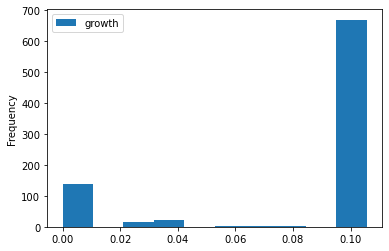

In [11]:
df.plot.hist()

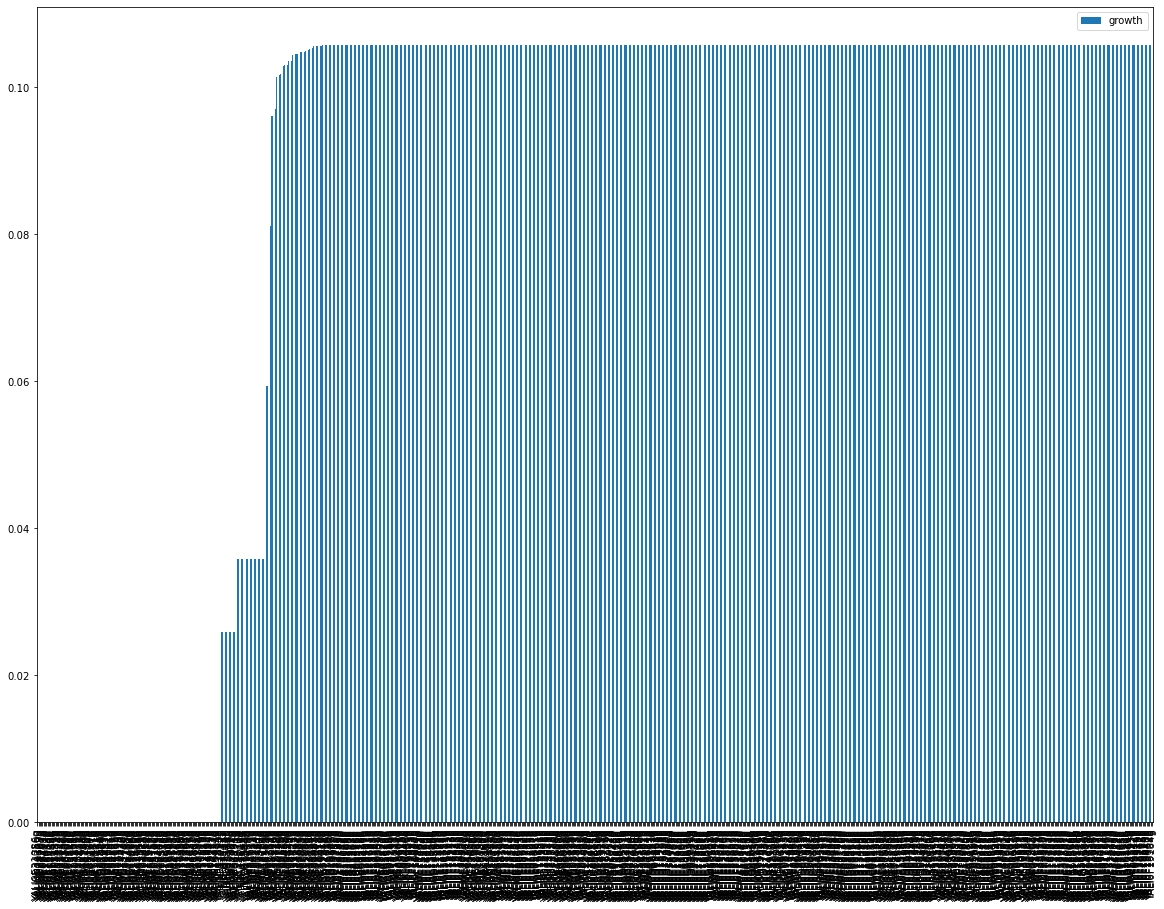

In [16]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(20, 15)

In [12]:
biomass_precursors = yali.reactions.xBIOMASS.reactants
len(biomass_precursors)

15

In [13]:
biomass_precursors

[<Metabolite s_0423 at 0x254342eaaf0>,
 <Metabolite s_0434 at 0x254342ea070>,
 <Metabolite s_0509 at 0x25434300730>,
 <Metabolite s_0526 at 0x25434300940>,
 <Metabolite s_0584 at 0x254343151f0>,
 <Metabolite s_0589 at 0x25434315310>,
 <Metabolite s_0615 at 0x25434315520>,
 <Metabolite s_0649 at 0x25434315910>,
 <Metabolite s_0782 at 0x2543432b670>,
 <Metabolite s_1520 at 0x25434393c10>,
 <Metabolite s_1545 at 0x25434393070>,
 <Metabolite s_0002 at 0x25434412460>,
 <Metabolite s_1107 at 0x25434412910>,
 <Metabolite m1726 at 0x25434450100>,
 <Metabolite m1727 at 0x25434450340>]

In [14]:
precursor_production = pd.DataFrame(columns=['knocked_gene', 'precursor', 'max_production'])
index = 0
for precursor in biomass_precursors:
    print('Determining essentiality profile for precursor: ' + precursor.id)
    with yali:
        yali.objective = yali.add_boundary(precursor, type='demand')
        for gene in yali.genes:
            with yali:
                gene.knock_out()
                precursor_production.loc[index] = gene.name, precursor.id, yali.slim_optimize(error_value=0.)
                index += 1

Determining essentiality profile for precursor: s_0423
Determining essentiality profile for precursor: s_0434
Determining essentiality profile for precursor: s_0509
Determining essentiality profile for precursor: s_0526
Determining essentiality profile for precursor: s_0584
Determining essentiality profile for precursor: s_0589
Determining essentiality profile for precursor: s_0615
Determining essentiality profile for precursor: s_0649
Determining essentiality profile for precursor: s_0782
Determining essentiality profile for precursor: s_1520
Determining essentiality profile for precursor: s_1545
Determining essentiality profile for precursor: s_0002
Determining essentiality profile for precursor: s_1107
Determining essentiality profile for precursor: m1726
Determining essentiality profile for precursor: m1727


In [15]:
precursor_production['can_produce'] = precursor_production['max_production'].apply(lambda x: 0 if x < 0.05 else 1)

In [16]:
precursor_production

,knocked_gene,precursor,max_production,can_produce
0,,s_0423,0.583475,1
1,,s_0423,0.583475,1
2,,s_0423,0.583475,1
3,,s_0423,0.583475,1
4,,s_0423,0.583475,1
...,...,...,...,...
12715,,m1727,1.243757,1
12716,,m1727,1.243757,1
12717,,m1727,1.243757,1
12718,,m1727,1.243757,1


In [17]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [20]:
df = precursor_production.pivot(index='precursor', columns='knocked_gene', values='can_produce')
data = [go.Heatmap(z=df.values.tolist())]
layout = go.Layout(xaxis=dict(title='knocked genes'), yaxis=dict(title='precursor'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

ValueError: Index contains duplicate entries, cannot reshape

In [18]:
type(essentiality)

dict

In [19]:
df2 = pd.DataFrame(data=essentiality, index=[0])

df2 = (df2.T)

df2.to_excel('essentiality knockdown.xlsx')

In [16]:
yali.reactions.xPOOL_FA_LP

Reaction identifier,xPOOL_FA_LP
Name,Fatty acids pool
Memory address,0x01af889c2d00
Stoichiometry,0.199 m1761 + 0.003 s_2841 + 0.002 s_2844 + 0.19 s_2846 + 0.042 s_2850 + 0.515 s_2852 <=> 0.951 m1641 0.199 linoleate + 0.003 laurate + 0.002 myristate + 0.19 palmitate + 0.042 stearate + 0.515 oleate <=> 0.951 fatty acid
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [5]:
yali.metabolites.s_1101

Metabolite identifier,s_1101
Name,malonyl-CoA
Memory address,0x01af88754af0
Formula,C24H33N7O19P3S
Compartment,c
In 4 reaction(s),"y002141, y003514, y000109, y002140"


In [6]:
yali.reactions.y002141

Reaction identifier,y002141
Name,fatty-acyl-CoA synthase (n-C18:0CoA)
Memory address,0x01af89235910
Stoichiometry,s_0373 + 24.0 s_0794 + 8.0 s_1101 + 16.0 s_1212 --> 8.0 s_0456 + 8.0 s_0529 + 8.0 s_0803 + 16.0 s_1207 + s_1454 acetyl-CoA + 24.0 H+ + 8.0 malonyl-CoA + 16.0 NADPH --> 8.0 carbon dioxide + 8.0 coenzyme A + 8.0 H2O + 16.0 NADP(+) + stearoyl-CoA
GPR,YALI0B15059g and YALI0B19382g
Lower bound,0.0
Upper bound,1000.0


In [7]:
yali.metabolites.s_1454

Metabolite identifier,s_1454
Name,stearoyl-CoA
Memory address,0x01af8877d070
Formula,C39H66N7O17P3S
Compartment,c
In 4 reaction(s),"y003519, y002141, y002223, y003579"


In [11]:
yali.reactions.y003579

Reaction identifier,y003579
Name,"stearoyl-CoA transport, cytoplasm-lipid particle"
Memory address,0x01af89394430
Stoichiometry,s_1454 <=> s_2851 stearoyl-CoA <=> stearoyl-CoA
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [12]:
yali.metabolites.s_2851

Metabolite identifier,s_2851
Name,stearoyl-CoA
Memory address,0x01af887bd430
Formula,C39H66N7O17P3S
Compartment,lp
In 3 reaction(s),"y003579, y002204, xPOOL_AC_LP"


In [13]:
yali.reactions.y002204

Reaction identifier,y002204
Name,"fatty-acid--CoA ligase (octadecanoate), lipid particle"
Memory address,0x01af892a0e50
Stoichiometry,s_0531 + s_2840 + s_2850 <=> s_0635 + s_2842 + s_2851 coenzyme A + ATP + stearate <=> diphosphate + AMP + stearoyl-CoA
GPR,YALI0D17864g
Lower bound,-1000.0
Upper bound,1000.0


In [14]:
yali.metabolites.s_2850 

Metabolite identifier,s_2850
Name,stearate
Memory address,0x01af887bd2b0
Formula,C18H35O2
Compartment,lp
In 3 reaction(s),"xPOOL_FA_LP, y003573, y002204"


In [73]:
yali.reactions.y003573

Reaction identifier,y003573
Name,"octadecanoate (n-C18:0) transport, cytoplasm-lipid particle"
Memory address,0x01af89394e20
Stoichiometry,s_1449 <=> s_2850 stearate <=> stearate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [74]:
yali.metabolites.s_1449

Metabolite identifier,s_1449
Name,stearate
Memory address,0x01af88813730
Formula,C18H35O2
Compartment,c
In 6 reaction(s),"y003573, y003512, y003679, y001981, y001236, y003610"


In [80]:
yali.reactions.y003610

Reaction identifier,y003610
Name,"stearate transport, cell envelope-cytoplasm"
Memory address,0x01af893b19d0
Stoichiometry,s_3464 <=> s_1449 stearate <=> stearate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [22]:
yali.reactions.y002140

Reaction identifier,y002140
Name,fatty-acyl-CoA synthase (n-C16:0CoA)
Memory address,0x01af89235d60
Stoichiometry,s_0373 + 21.0 s_0794 + 7.0 s_1101 + 14.0 s_1212 --> 7.0 s_0456 + 7.0 s_0529 + 7.0 s_0803 + 14.0 s_1207 + s_1302 acetyl-CoA + 21.0 H+ + 7.0 malonyl-CoA + 14.0 NADPH --> 7.0 carbon dioxide + 7.0 coenzyme A + 7.0 H2O + 14.0 NADP(+) + palmitoyl-CoA
GPR,YALI0B15059g and YALI0B19382g
Lower bound,0.0
Upper bound,1000.0


In [23]:
yali.metabolites.s_1302

Metabolite identifier,s_1302
Name,palmitoyl-CoA
Memory address,0x01af88769fd0
Formula,C37H62N7O17P3S
Compartment,c
In 5 reaction(s),"y003517, y002140, y003577, y001995, y002221"


In [26]:
yali.reactions.y003577

Reaction identifier,y003577
Name,"palmitoyl-CoA transport, cytoplasm-lipid particle"
Memory address,0x01af89394e80
Stoichiometry,s_1302 <=> s_2847 palmitoyl-CoA <=> palmitoyl-CoA
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [82]:
yali.metabolites.s_2847

Metabolite identifier,s_2847
Name,palmitoyl-CoA
Memory address,0x01af887bd1c0
Formula,C37H62N7O17P3S
Compartment,lp
In 3 reaction(s),"y002202, y003577, xPOOL_AC_LP"


In [85]:
yali.reactions.y002202

Reaction identifier,y002202
Name,"fatty-acid--CoA ligase (hexadecanoate), lipid particle"
Memory address,0x01af892a0e80
Stoichiometry,s_0531 + s_2840 + s_2846 <=> s_0635 + s_2842 + s_2847 coenzyme A + ATP + palmitate <=> diphosphate + AMP + palmitoyl-CoA
GPR,YALI0D17864g
Lower bound,-1000.0
Upper bound,1000.0


In [27]:
yali.metabolites.s_2843

Metabolite identifier,s_2843
Name,lauroyl-CoA
Memory address,0x01af887bd370
Formula,C33H54N7O17P3S
Compartment,lp
In 3 reaction(s),"y003575, y002200, xPOOL_AC_LP"


In [37]:
yali.reactions.y002200

Reaction identifier,y002200
Name,"fatty-acid--CoA ligase (dodecanoate), lipid particle"
Memory address,0x01af892a0a60
Stoichiometry,s_0531 + s_2840 + s_2841 <=> s_0635 + s_2842 + s_2843 coenzyme A + ATP + laurate <=> diphosphate + AMP + lauroyl-CoA
GPR,YALI0D17864g
Lower bound,-1000.0
Upper bound,1000.0


In [38]:
yali.metabolites.s_2841 

Metabolite identifier,s_2841
Name,laurate
Memory address,0x01af887bd040
Formula,C12H23O2
Compartment,lp
In 3 reaction(s),"xPOOL_FA_LP, y003681, y002200"


In [55]:
yali.metabolites.s_2844

Metabolite identifier,s_2844
Name,myristate
Memory address,0x01af887bd2e0
Formula,C14H27O2
Compartment,lp
In 3 reaction(s),"xPOOL_FA_LP, y003682, y002201"


In [58]:
model = load_model("e_coli_core")yali.reactions.y003682

Reaction identifier,y003682
Name,"myristate transport, ER membrane-lipid particle"
Memory address,0x01af893c14c0
Stoichiometry,s_2835 <=> s_2844 myristate <=> myristate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [59]:
yali.metabolites.s_2835 

Metabolite identifier,s_2835
Name,myristate
Memory address,0x01af887bd0a0
Formula,C14H27O2
Compartment,erm
In 4 reaction(s),"xPOOL_FA_EM, y002195, y003509, y003682"


In [61]:
yali.reactions.y003509

Reaction identifier,y003509
Name,"myristate transport, cytoplasm-ER membrane"
Memory address,0x01af892efb80
Stoichiometry,s_1161 <=> s_2835 myristate <=> myristate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [62]:
yali.metabolites.s_1161 

Metabolite identifier,s_1161
Name,myristate
Memory address,0x01af88813520
Formula,C14H27O2
Compartment,c
In 3 reaction(s),"y003509, y001772, y001777"


In [69]:
yali.reactions.y001777

Reaction identifier,y001777
Name,myristate (n-C14:0) transport
Memory address,0x01af8915d7c0
Stoichiometry,s_1163 <=> s_1161 myristate <=> myristate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [71]:
yali.metabolites.s_1163 

Metabolite identifier,s_1163
Name,myristate
Memory address,0x01af887fe910
Formula,C14H27O2
Compartment,e
In 2 reaction(s),"y001777, y002193"


In [4]:
yali.metabolites.s_0635

Metabolite identifier,s_0635
Name,diphosphate
Memory address,0x01905d902e80
Formula,HO7P2
Compartment,lp
In 30 reaction(s),"y000285, y000291, y000297, y000289, y002217, y000299, y000286, y000292, y003587, y000298, y000284, y000296, y002205, y000290, y000283, y002201, y000288, y000294, y002216, y300011, y002218, y002202,..."


In [5]:
yali.metabolites.s_0021

Metabolite identifier,s_0021
Name,(R)-carnitine
Memory address,0x01905d8aa700
Formula,C7H15NO3
Compartment,c
In 6 reaction(s),"y001674, y000252, y001120, y001882, y001191, y001673"


In [14]:
yali.reactions.y001882

Reaction identifier,y001882
Name,L-carnitine transport
Memory address,0x01905e3a6790
Stoichiometry,s_0023 --> s_0021 (R)-carnitine --> (R)-carnitine
GPR,
Lower bound,0.0
Upper bound,1000.0


In [13]:
yali.metabolites.s_0023 

Metabolite identifier,s_0023
Name,(R)-carnitine
Memory address,0x01905d8aa760
Formula,C7H15NO3
Compartment,m
In 3 reaction(s),"y001882, y000254, y001120"


In [6]:
yali.metabolites.s_1235

Metabolite identifier,s_1235
Name,O-acetylcarnitine
Memory address,0x01905d96c940
Formula,C9H17NO4
Compartment,c
In 5 reaction(s),"y001976, y001674, y000252, y001638, y001120"


In [15]:
yali.reactions.y001976

Reaction identifier,y001976
Name,O-acetylcarnintine transport into mitochondria
Memory address,0x01905e3dbc10
Stoichiometry,s_1235 --> s_1236 O-acetylcarnitine --> O-acetylcarnitine
GPR,
Lower bound,0.0
Upper bound,1000.0


In [26]:
yali.reactions.y003512

Reaction identifier,y003512
Name,"stearate transport, cytoplasm-ER membrane"
Memory address,0x0222f1f3cc10
Stoichiometry,s_1449 <=> s_2838 stearate <=> stearate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [16]:
yali.metabolites.s_1449 

Metabolite identifier,s_1449
Name,stearate
Memory address,0x0222f13c8f40
Formula,C18H35O2
Compartment,c
In 6 reaction(s),"y003573, y003512, y001236, y003679, y001981, y003610"


In [45]:
yali.reactions.y001981

Reaction identifier,y001981
Name,octadecanoate (n-C18:0) transport
Memory address,0x0222f1db5790
Stoichiometry,s_1450 <=> s_1449 stearate <=> stearate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [46]:
yali.metabolites.s_1450 

Metabolite identifier,s_1450
Name,stearate
Memory address,0x0222f13c8340
Formula,C18H35O2
Compartment,e
In 2 reaction(s),"y001981, y002055"


In [47]:
yali.reactions.y002055

Reaction identifier,y002055
Name,stearate exchange
Memory address,0x0222f1dd0eb0
Stoichiometry,s_1450 --> stearate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [9]:
flux = yali.reactions[1]
flux

Reaction identifier,xBIOMASS
Name,Biomass production
Memory address,0x7ff30bebe150
Stoichiometry,m1726 + m1727 + 0.4415 s_0002 + 0.0757 s_0423 + 86.7881 s_0434 + 0.4068 s_0509 + 0.0578 s_0526 + 0.0383 s_0584 + 0.0377 s_0589 + 0.0377 s_0615 + 0.0383 s_0649 + 0.093 s_0782 + 0.1104 s_1107 +... protein + lipids + 0.4415 (1-3)-beta-D-glucan + 0.0757 AMP + 86.7881 ATP + 0.4068 chitin + 0.0578 CMP + 0.0383 dAMP + 0.0377 dCMP + 0.0377 dGMP + 0.0383 dTMP + 0.093 GMP + 0.1104 mannan + 0.0032...
GPR,
Lower bound,0.0
Upper bound,1000.0
